## ProjF5 - Final Model

Use this document as a template to provide the evaluation of your final model. You are welcome to go in as much depth as needed.

Make sure you keep the sections specified in this template, but you are welcome to add more cells with your code or explanation as needed.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from keras import Model
from keras import Sequential
from keras.optimizers import Adam
from keras.layers import Dense, Dropout
from keras.losses import MeanSquaredLogarithmicError
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

### 1. Load and Prepare Data

This should illustrate your code for loading the dataset and the split into training, validation and testing. You can add steps like pre-processing if needed.

In [ ]:
def loadData(dataFile):
    sheet = pd.read_excel(dataFile[0])
    for data in dataFile[1:]:
      sheet2 = pd.read_excel(data)
      sheet = pd.concat([sheet, sheet2], axis = 0)
    sheet['Time'] = pd.to_datetime(sheet['Time'])
    sheet['Time'] = (sheet['Time'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
    data = np.array(sheet)
    x = data[:,:-1]
    y = data[:,-1]

    return x, y

In [ ]:
import glob
import os
from sklearn.model_selection import train_test_split

files = glob.glob(os.path.join('/content/data', "*.xlsx"))
X, Y = loadData(files)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print("Training Set Size:", len(X_train))
print("Test Set Size:", len(X_test))
print("Validation Set Size:", len(X_val))
print("Test Set Ratio:", len(X_test)/(len(X_train) + len(X_val)))
print("Validation Set Ratio:", len(X_val)/(len(X_train) + len(X_test)))

Training Set Size: 1308
Test Set Size: 410
Validation Set Size: 328
Test Set Ratio: 0.2506112469437653
Validation Set Ratio: 0.1909196740395809


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
X_val_scaled = scaler.fit_transform(X_val)

### 2. Prepare your Final Model

Here you can have your code to either train (e.g., if you are building it from scratch) your model. These steps may require you to use other packages or python files. You can just call them here. You don't have to include them in your submission. Remember that we will be looking at the saved outputs in the notebooked and we will not run the entire notebook.

In [ ]:
learning_rate = 0.01

model = Sequential()
model.add(Dense(160, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(480, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='relu'))

msle = MeanSquaredLogarithmicError()
model.compile(loss=msle, optimizer=Adam(learning_rate=learning_rate), metrics = [msle])
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_val_scaled, y_val))
y_test_pred = model.predict(X_test_scaled)
y_train_pred = model.predict(X_train_scaled)

Epoch 1/10
41/41 [==============================] - 2s 12ms/step - loss: 0.9750 - mean_squared_logarithmic_error: 0.9721 - val_loss: 0.0250 - val_mean_squared_logarithmic_error: 0.0267
Epoch 2/10
41/41 [==============================] - 0s 8ms/step - loss: 0.0221 - mean_squared_logarithmic_error: 0.0221 - val_loss: 0.0067 - val_mean_squared_logarithmic_error: 0.0074
Epoch 3/10
41/41 [==============================] - 0s 7ms/step - loss: 0.0102 - mean_squared_logarithmic_error: 0.0102 - val_loss: 0.0048 - val_mean_squared_logarithmic_error: 0.0052
Epoch 4/10
41/41 [==============================] - 0s 8ms/step - loss: 0.0068 - mean_squared_logarithmic_error: 0.0068 - val_loss: 0.0017 - val_mean_squared_logarithmic_error: 0.0020
Epoch 5/10
41/41 [==============================] - 0s 7ms/step - loss: 0.0056 - mean_squared_logarithmic_error: 0.0056 - val_loss: 0.0019 - val_mean_squared_logarithmic_error: 0.0021
Epoch 6/10
41/41 [==============================] - 0s 7ms/step - loss: 0.0053 

### 3. Model Performance

Make sure to include the following:
- Performance on the training set
- Performance on the test set
- Provide some screenshots of your output (e.g., pictures, text output, or a histogram of predicted values in the case of tabular data). Any visualization of the predictions are welcome.

In [ ]:
mse_test = mean_squared_error(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)

r2_test = r2_score(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)

print("Mean Squared Error (Test):", mse_test)
print("Mean Squared Error (Train):", mse_train)
print("R^2 Score (Test):", r2_test)
print("R^2 Score (Train):", r2_train)

Mean Squared Error (Test): 1.2998649324680593
Mean Squared Error (Train): 1.1919967418214976
R^2 Score (Test): 0.95743149435161
R^2 Score (Train): 0.9620371746327311


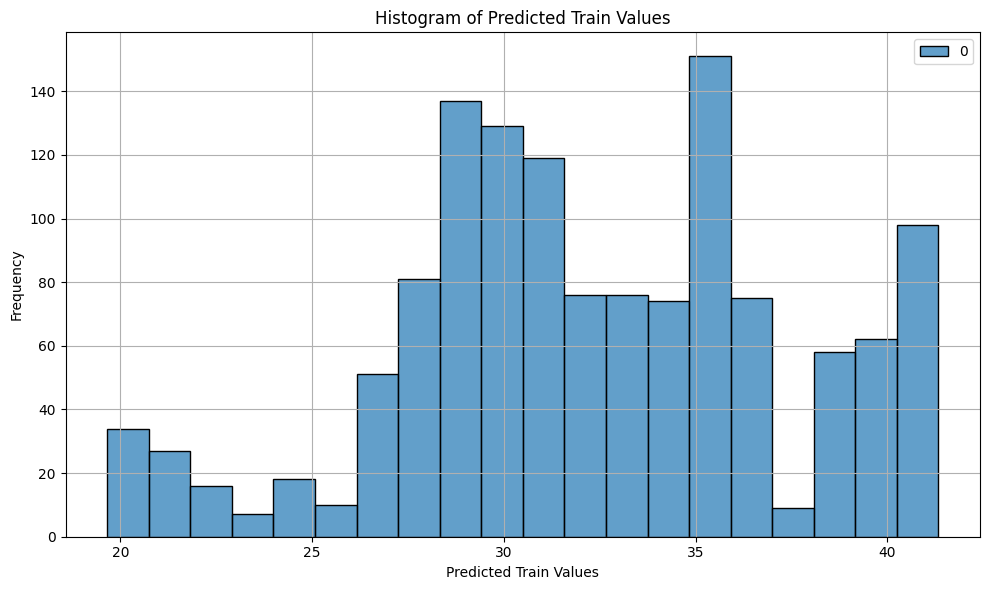

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(y_train_pred, bins=20, alpha=0.7)
plt.xlabel('Predicted Train Values')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Train Values')
plt.grid(True)
plt.tight_layout()
plt.show()

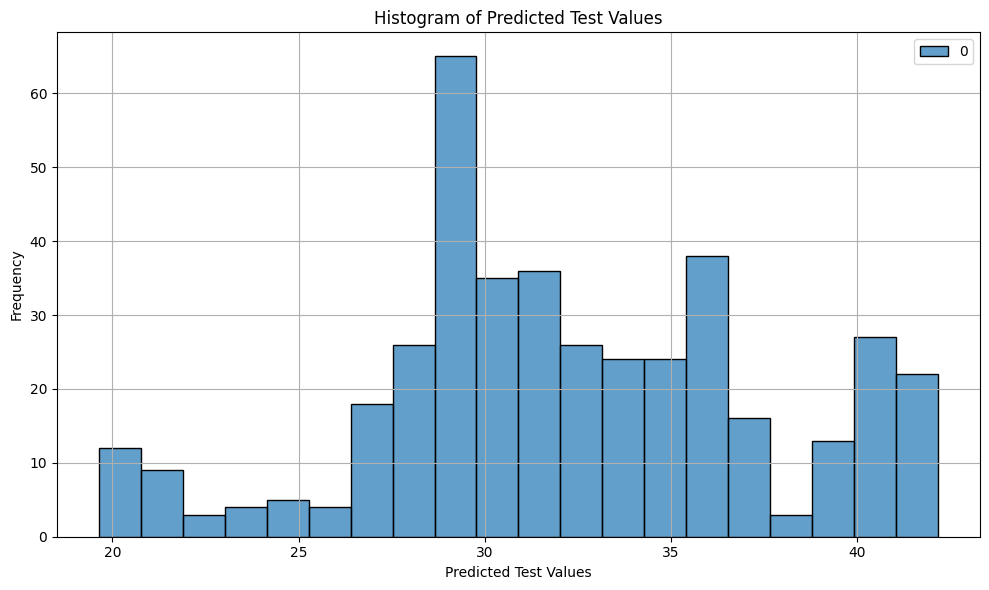

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(y_test_pred, bins=20, alpha=0.7)
plt.xlabel('Predicted Test Values')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Test Values')
plt.grid(True)
plt.tight_layout()
plt.show()

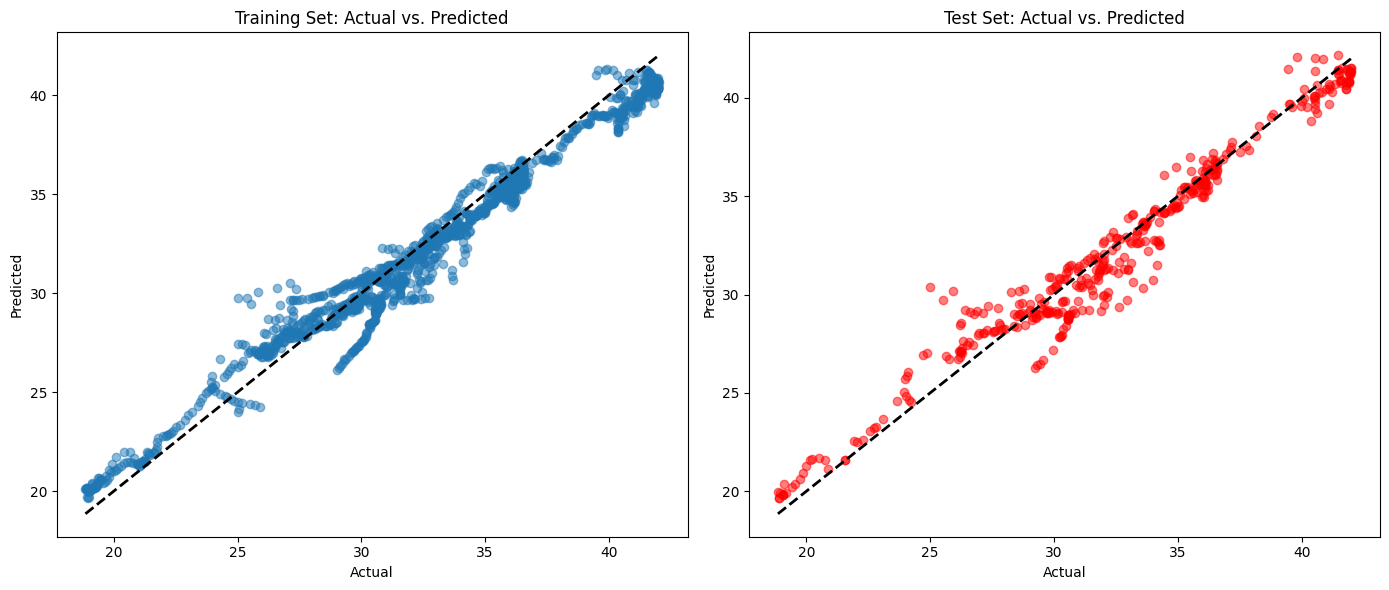

In [ ]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Set: Actual vs. Predicted')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.5, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Set: Actual vs. Predicted')

plt.tight_layout()
plt.show()

In [ ]:
df_pred = pd.DataFrame()
df_pred['Time'] = (X_test[:, 0] * pd.Timedelta('1s')) + pd.Timestamp("1970-01-01")
df_pred['Predictions'] = y_test_pred[:, 0]
g = df_pred.groupby(pd.Grouper(key='Time', freq='M'))
dfs_pred = [group for _,group in g]

In [ ]:
df_actual = pd.DataFrame()
df_actual['Time'] = (X_test[:, 0] * pd.Timedelta('1s')) + pd.Timestamp("1970-01-01")
df_actual['Actual'] = y_test
g = df_actual.groupby(pd.Grouper(key='Time', freq='M'))
dfs_actual = [group for _,group in g]

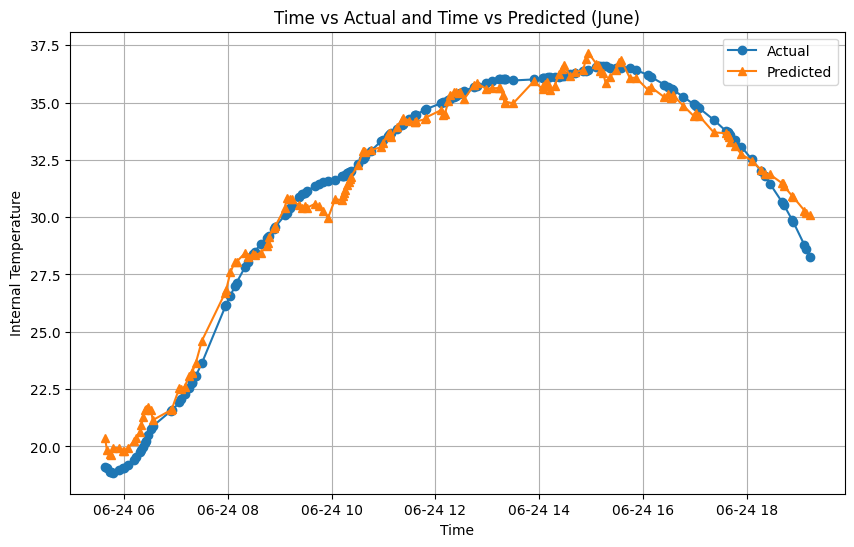

In [ ]:
month = 0

plt.figure(figsize=(10, 6))
plt.plot(dfs_actual[month]['Time'], dfs_actual[month]['Actual'], marker='o', label='Actual')
plt.plot(dfs_actual[month]['Time'], dfs_pred[month]['Predictions'], marker='^', label='Predicted')

plt.title('Time vs Actual and Time vs Predicted (June)')
plt.xlabel('Time')
plt.ylabel('Internal Temperature')

plt.legend()

plt.grid(True)

plt.show()

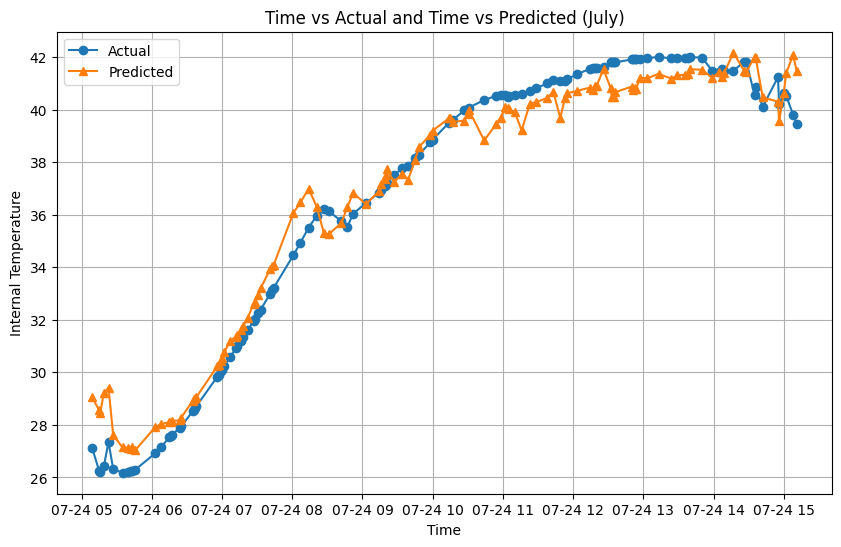

In [ ]:
month = 1

plt.figure(figsize=(10, 6))
plt.plot(dfs_actual[month]['Time'], dfs_actual[month]['Actual'], marker='o', label='Actual')
plt.plot(dfs_actual[month]['Time'], dfs_pred[month]['Predictions'], marker='^', label='Predicted')

plt.title('Time vs Actual and Time vs Predicted (July)')
plt.xlabel('Time')
plt.ylabel('Internal Temperature')

plt.legend()

plt.grid(True)

plt.show()

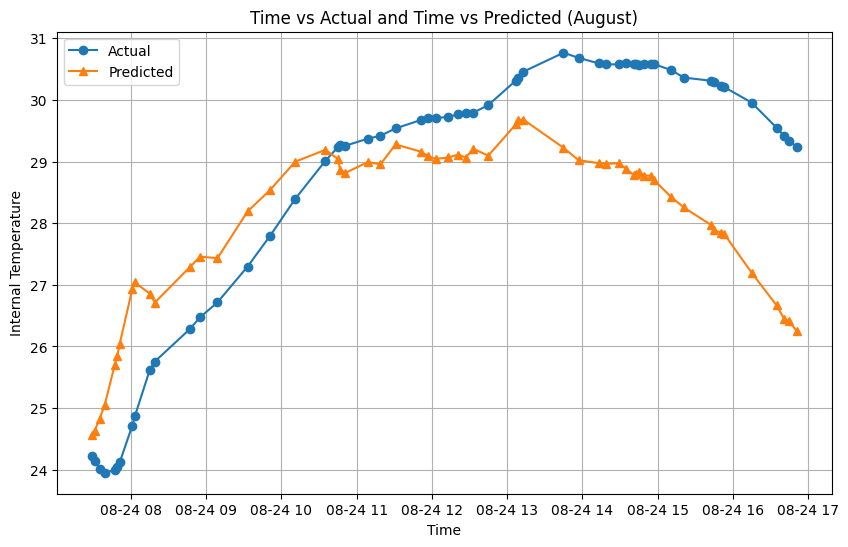

In [ ]:
month = 2

plt.figure(figsize=(10, 6))
plt.plot(dfs_actual[month]['Time'], dfs_actual[month]['Actual'], marker='o', label='Actual')
plt.plot(dfs_actual[month]['Time'], dfs_pred[month]['Predictions'], marker='^', label='Predicted')

plt.title('Time vs Actual and Time vs Predicted (August)')
plt.xlabel('Time')
plt.ylabel('Internal Temperature')

plt.legend()

plt.grid(True)

plt.show()

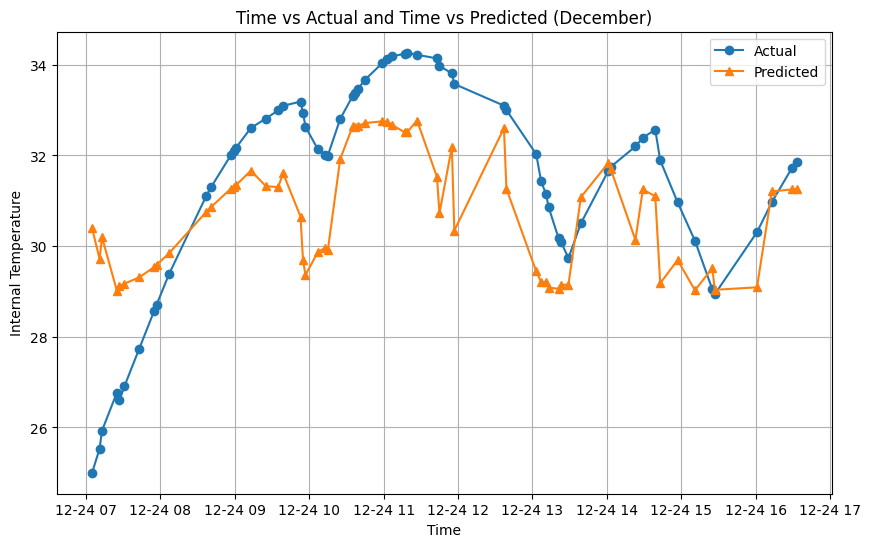

In [ ]:
month = 6

plt.figure(figsize=(10, 6))
plt.plot(dfs_actual[month]['Time'], dfs_actual[month]['Actual'], marker='o', label='Actual')
plt.plot(dfs_actual[month]['Time'], dfs_pred[month]['Predictions'], marker='^', label='Predicted')

plt.title('Time vs Actual and Time vs Predicted (December)')
plt.xlabel('Time')
plt.ylabel('Internal Temperature')

plt.legend()

plt.grid(True)

plt.show()